### Cross Validation for SEM-K-OMP

In [1]:
import matplotlib.pyplot as plt
import numpy as np


import sys
sys.path.append("..")
from notears.notears.notears import linear
from notears.notears.notears import utils
import helper.helper as h
import helper.methods as m

from importlib import reload  # Python 3.4+

reload(h)

<module 'helper.helper' from '..\\helper\\helper.py'>

In [216]:
# help(linear)
W_a, h_val = linear.notears_linear(X, lambda1 = 0, loss_type = 'l2')

print(W_a)

h: 6.31355856484106e-10.
rho: 100000000000.0.
loss: (0.9647527904779178, array([ 0.01684139, -0.00051158,  0.01612322,  0.02077794, -0.01684139,
        0.00051158, -0.01612322, -0.02077794])).
[[0.         0.92536624]
 [0.         0.        ]]


In [129]:
# set random seed
# utils.set_random_seed(1)
reload(m)

# print W
T, n, s0, graph_type, sem_type = 100, 10, 20, 'ER', 'gauss'
W_true = utils.simulate_parameter(utils.simulate_dag(n, s0, graph_type), w_ranges = ((-2.0, -0.75), (0.75, 2.0)))
print(f"True W:\n{np.round(W_true, 2)}.\n")

# plot X
X = utils.simulate_linear_sem(W_true, T, sem_type)
# X -= np.mean(X, axis = 0)
W_K, r = m._K_OMP(X, X, tol = 1e-6, F = [i * (n + 1) for i in range(n)], normalize = True)
W_S = m._OMP_SEM(X)
W_K2, r = K_OMP(X, X, tol = 1e-6, F = [i * (n + 1) for i in range(n)])
W_N, h_val = linear.notears_linear(X, lambda1 = 0.0, loss_type = 'l2', verbose = False)

print(np.round(W_K, 1))
print(h.MSE(W_K, X, is_sem = True))

print(np.round(W_K2, 1))
print(h.MSE(W_K2, X, is_sem = True))

print(np.round(W_S, 1))
print(h.MSE(W_S, X, is_sem = True))

print(np.round(W_N, 1))
print(h.MSE(W_N, X, is_sem = True))

True W:
[[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [-1.2   0.    1.76  0.   -1.83  0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.   -0.84  0.    0.    0.    0.    0.    0.  ]
 [-1.06  0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.   -1.75  0.    0.    1.61  0.    0.    0.    0.  ]
 [ 0.    0.    0.   -1.54  0.    0.    0.    0.    0.    0.  ]
 [ 1.6   0.    0.    0.   -1.82  1.18  0.    0.    0.    0.  ]
 [ 1.52  0.    0.    1.66  0.   -1.68  0.    0.    0.    0.  ]
 [ 0.    0.    0.   -1.79  1.51  0.    0.    0.    0.    0.  ]
 [ 1.46 -1.29  0.    1.83  0.    0.    0.    0.   -1.42  0.  ]].

[[ 0.   0.   0.  -0.4  0.   0.   0.   0.   0.   0. ]
 [-1.6  0.   1.7 -0.4 -1.9  0.1  0.   0.   0.   0. ]
 [ 1.1  0.   0.  -0.4  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.4  0.  -1.7 -0.   0.   1.7  0.   0.   0.   0. ]
 [ 1.6  0.  -0.1 -0.8  0.   0.   0.   0.   0.   0. ]
 [ 1.7 -0.1  0.1  0.7 -2.   1.4  0.   0. 

In [302]:
reload(m)

<module 'helper.methods' from '..\\helper\\methods.py'>

In [173]:
print(X.T.dot(X))



[[ 39.95672185 -27.73904087]
 [-27.73904087  59.86152954]]


In [135]:
print(h.score(X, W_K2, W_true))

True Positive Rate: 0.95.
True Negative Rate: 0.675.
False Prediction Rate: 0.578
Accuracy: 0.73.
R-Squared: 0.005
Mean Squared Error: 371.055
(0.95, 0.675, 0.5777777777777777, 0.73, 27, 371.05478283694185, 0.0051404822551297)


0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

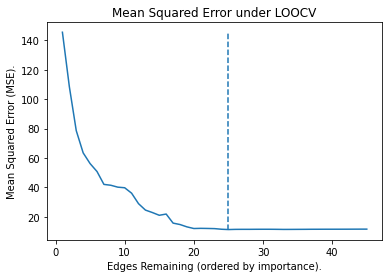

In [130]:
def LOOCV(X):
   
    mses_avg = []
    
    for i in range(T):
        
        print(i, end = ", ")
        # run OMP on all excluding one X_i
        # we do this by simply attaching X_i+1: to X_:i-1
        # however, the gap is too large, so we need to remove the "effect" of X_i
        # we do this by subtracting the difference between X_i and X_i-1 from X_i+1:
        X_train = np.delete(X, i, axis = 0)

        # run OMP
        W, Ws = K_OMP(X_train, X_train, tol = 1e-6, F = [i * (n + 1) for i in range(n)], normalize = True)
        
        mses = []
        
        for W in Ws:
            mses.append(np.linalg.norm(X[i] - X[i] @ W) ** 2)
        
        mses_avg.append(mses)
        
    mses_avg = np.array(mses_avg) 
    
    avg = np.sum(mses_avg, axis = 0) / np.shape(mses_avg)[0]
    
    plt.title("Mean Squared Error under LOOCV")
    plt.xlabel("Edges Remaining (ordered by importance).")
    plt.ylabel("Mean Squared Error (MSE).")
    plt.vlines(np.argmin(avg) + 1, min(avg) - 0.25, max(avg), linestyle = '--')
    plt.plot(range(1, len(avg) + 1), avg)
    
    return avg

T = 100
X = utils.simulate_linear_sem(W_true, T, sem_type)
mses_avg = LOOCV(X);

In [67]:
print(np.shape(X[:T//2]))
print(T)

(250, 10)
500


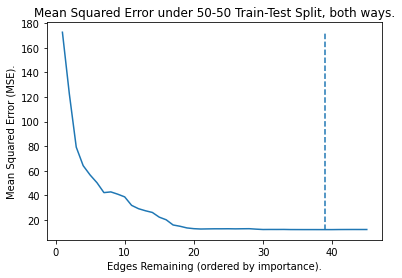

In [133]:
def SPLIT(X):
   
    mses_avg = []
    
    for i in range(1):
        # run OMP on all excluding one X_i
        # we do this by simply attaching X_i+1: to X_:i-1
        # however, the gap is too large, so we need to remove the "effect" of X_i
        # we do this by subtracting the difference between X_i and X_i-1 from X_i+1:

        # run OMP
        W, Ws = K_OMP(X[:T//2], X[:T//2], tol = 1e-6, F = [i * (n + 1) for i in range(n)], normalize = True, output = True)
        
        mses = []
        
        for W in Ws:
            mses.append(np.linalg.norm(X[T//2:] - X[T//2:] @ W) ** 2 / (T // 2))

        mses_avg.append(mses)
        
        W, Ws = K_OMP(X[T//2:], X[T//2:], F = [i * (n + 1) for i in range(n)], output = True, normalize = True)
        
        mses = []
        
        for W in Ws:
            mses.append(np.linalg.norm(X[:T//2] - X[:T//2] @ W) ** 2 / (T // 2))
        
        mses_avg.append(mses)
        
    mses_avg = np.array(mses_avg) 
    avg = np.sum(mses_avg, axis = 0) / np.shape(mses_avg)[0]
    
    plt.title("Mean Squared Error under 50-50 Train-Test Split, both ways.")
    plt.xlabel("Edges Remaining (ordered by importance).")
    plt.ylabel("Mean Squared Error (MSE).")
    plt.vlines(np.argmin(avg) + 1, min(avg) - 0.25, max(avg), linestyle = '--')
    plt.plot(range(1, len(avg) + 1), avg)
    
    return avg

# X = utils.simulate_linear_sem(W_true, T, sem_type)
mses_avg = SPLIT(X)

In [39]:
def K_OMP(X, Y, max_coefs = 1e10, tol = 1e-12, verbose = False, output = False, F = [], normalize = True):
    """Do Kernel OMP on X, Y."""

    def Lambda_to_adj(Lambda):
        """Convert Lambda list to adjacency matrix"""
        n = len(Lambda)
    
        adj_mat = np.zeros((n, n))
    
        for i, col in enumerate(Lambda):
            adj_mat[i, col] = 1 
    
        return adj_mat
    
    # get dimensions
    T, n = np.shape(X)
    
    # compute kernel spaces
    Psi = X.T.dot(X)                    # p times p
    K = X.T.dot(Y)                      # p  times p
    Theta = [y.T.dot(y) for y in Y.T]   # 1 times 1
    
    # initialize Lambda, idx, betas
    Lambda, idx, betas = [[] for _ in range(n)], [], np.zeros((n, n))
    
    norms = [1] * n
    if normalize: norms = [np.linalg.norm(x, 2) for x in X.T]
    Ws = []
    
    # for each possible coefficient
    for i in range(n ** 2):    
    
        # compute gains
        gains = np.abs([(k - betas.T @ Psi[i, :]) / norms[i] for i, k in enumerate(K)])
        
        # set forbidden set to -1, impossible to pick then
        gains = gains.flatten()
        gains[F] = - np.ones(len(F))
        gains = gains.reshape(n, n)

        # print(np.round(gains, 2))
        if np.max(gains) <= tol: break

        # append best atom to Lambda
        to_pick = np.argmax(gains)

        # if tie, pick the one that minimizes residual        
        if len(np.flatnonzero(gains == gains.max())) > 1:   
            
            mse_best_tie = np.inf
            
            # check which yields the smallest MSE
            for tie in np.flatnonzero(gains == gains.max()):
                
                # get row and column of tie
                row, col = tie // n, tie % n
                
                # add to list of suitable atoms
                idx_temp, betas_temp = Lambda[col].copy(), betas.copy()
                idx_temp.append(row)

                # update betas        
                betas_temp[np.array(idx_temp)[:, None], col] = np.linalg.inv(Psi[np.array(idx_temp)[:, None], np.array(idx_temp)[None, :]]) @ K[np.array(idx_temp)[:, None], col]
                
                # check MSE
                mse_tie = h.MSE(betas_temp, X, is_sem = True)

                if mse_tie < mse_best_tie:
                    mse_best_tie = mse_tie
                    to_pick = tie
            
            print("Broke Tie")

        row, col = to_pick // n, to_pick % n
        Lambda[col].append(row)
    
        # check if we have a DAG, not super efficient
        if h.is_dag(Lambda_to_adj(Lambda)): 
            # update only column col, use indices of 
            idx = Lambda[col]
            Psi_F = Psi[np.array(idx)[:, None], np.array(idx)[None, :]]
        
            # update betas        
            betas[np.array(idx)[:, None], col] = np.linalg.inv(Psi_F) @ K[np.array(idx)[:, None], col]
            
            Ws.append(betas.copy())
            
        else:
            # append forbidden entry to forbidden list
            F.append(int(np.argmax(gains)))
            # remove coefficient from Lambda
            Lambda[col].remove(row)
    
        # print info if verbose
        if verbose:
            print(f"Iteration {i + 1}.\n")
            print(f"Gains:\n{np.round(gains, 3)}.\n")
            print(f"Beta_{i + 1}:\n{np.round(betas, 3)}.\n")
            print(f"Residual Squared: {np.round([Theta[i] - K[:, i] @ betas[:, i] for i in range(n)], 32)}.\n\n")

    return betas, Ws #, [Theta[i] - K[:, i] @ betas[:, i] for i in range(n)]

K_OMP(X, X, F = [i * (n + 1) for i in range(n)], normalize = True)

(array([[ 0.        ,  0.92566662, -0.01334066,  0.78018366, -0.08398154],
        [ 0.        ,  0.        ,  0.11237819,  0.65250108,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.17201879,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.78533977,  0.92987278,  0.05382256,  0.        ]]),
 [array([[0.       , 0.       , 0.       , 0.       , 0.       ],
         [0.       , 0.       , 0.       , 1.0350751, 0.       ],
         [0.       , 0.       , 0.       , 0.       , 0.       ],
         [0.       , 0.       , 0.       , 0.       , 0.       ],
         [0.       , 0.       , 0.       , 0.       , 0.       ]]),
  array([[0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 1.0350751 , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ],
       